Época 50/500, Loss: 0.161298
Época 100/500, Loss: 0.117015
Época 150/500, Loss: 0.100943
Época 200/500, Loss: 0.090694
Época 250/500, Loss: 0.080605
Época 300/500, Loss: 0.072817
Época 350/500, Loss: 0.062159
Época 400/500, Loss: 0.048052
Época 450/500, Loss: 0.033935
Época 500/500, Loss: 0.023214

Erro médio quadrático nos dados de teste: 0.407345


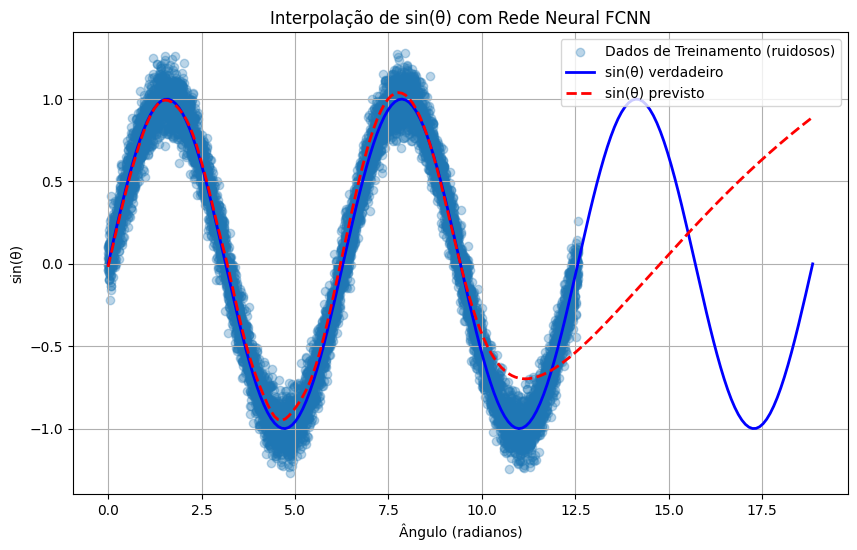

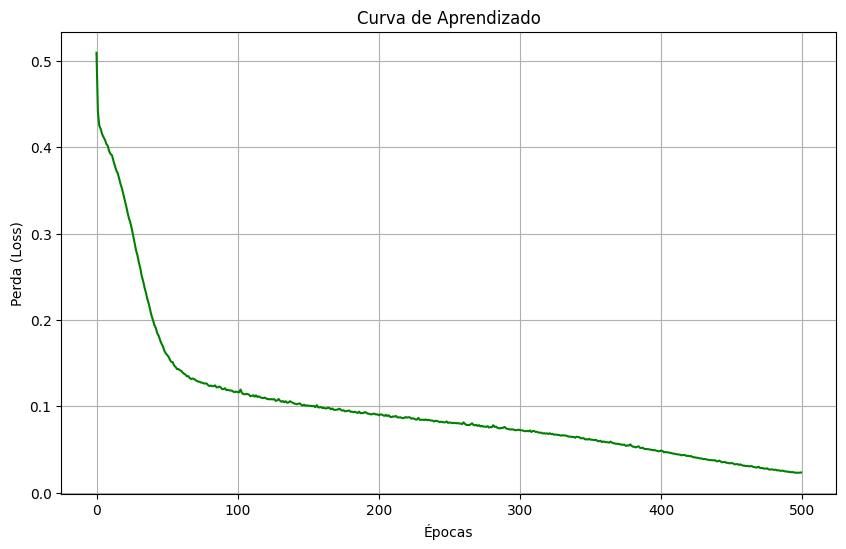

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. Gerar dados de treinamento
torch.manual_seed(42)
num_samples = 10000
angles = np.random.uniform(0, 4 * np.pi, num_samples).reshape(-1, 1)
angles_train = torch.tensor(angles, dtype=torch.float32)
sin_train = torch.sin(angles_train)

# Adicionar ruído (opcional)
noise = torch.randn_like(sin_train) * 0.1
sin_train_noisy = sin_train + noise

# Dataset e DataLoader
train_dataset = torch.utils.data.TensorDataset(angles_train, sin_train_noisy)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

# 2. Definir o modelo FCNN
class FCNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(1, 64),
            torch.nn.Tanh(),
            torch.nn.Linear(64, 64),
            torch.nn.Tanh(),
            torch.nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

model = FCNN()

# 3. Treinamento
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

epochs = 500
losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_angles, batch_sin in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_angles)
        loss = criterion(outputs, batch_sin)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    # Salvar perda média da época
    losses.append(epoch_loss / len(train_loader))

    if (epoch + 1) % 50 == 0:
        print(f"Época {epoch+1}/{epochs}, Loss: {losses[-1]:.6f}")

# 4. Dados de teste
num_test_samples = 200
angles_test = torch.linspace(0, 6 * np.pi, num_test_samples).reshape(-1, 1)
sin_test_true = torch.sin(angles_test)

# 5. Previsões
model.eval()
with torch.no_grad():
    sin_test_pred = model(angles_test)

# 6. Avaliação
test_mse = criterion(sin_test_pred, sin_test_true).item()
print(f"\nErro médio quadrático nos dados de teste: {test_mse:.6f}")

# 7. Visualizações
plt.figure(figsize=(10, 6))
plt.scatter(angles_train.numpy(), sin_train_noisy.numpy(), label='Dados de Treinamento (ruidosos)', alpha=0.3)
plt.plot(angles_test.numpy(), sin_test_true.numpy(), label='sin(θ) verdadeiro', color='blue', linewidth=2)
plt.plot(angles_test.numpy(), sin_test_pred.numpy(), label='sin(θ) previsto', color='red', linestyle='--', linewidth=2)
plt.xlabel('Ângulo (radianos)')
plt.ylabel('sin(θ)')
plt.title('Interpolação de sin(θ) com Rede Neural FCNN')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(losses, color='green')
plt.xlabel('Épocas')
plt.ylabel('Perda (Loss)')
plt.title('Curva de Aprendizado')
plt.grid(True)
plt.show()
